# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

IMAGE_PATH = 'img_align_celeba/'
image_size = 64
# SAMPLE_PATH = '../'

# if not os.path.exists(SAMPLE_PATH):
#     os.makedirs(SAMPLE_PATH)
    
    
transform = transforms.Compose([
    #transforms.Scale(image_size),
    transforms.Resize(image_size),
    transforms.CenterCrop((image_size,image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
data_loader = ImageFolder(IMAGE_PATH, transform)


#data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=8, drop_last=True)
valid_loader, train_loader, test_loader = get_celeba_dataloader(data_loader, 
                                                                batch_size=128)
test_batch = iter(test_loader)
test_batch = next(test_batch)
new_labels =torch.tensor(test_batch[1])
print(torch.tensor(test_batch[0]).shape)
#latent_dist = model.encode(torch.tensor(test_batch[0]).cuda())




162079 20259 20261
torch.Size([128, 3, 64, 64])


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


### Define latent distribution of the model

In [2]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.models_f import VAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np



#valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 20
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
# model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=1.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 2
lambda_od = 10*lambda_d
lambda_dis = 20*lambda_d 
path="ReportFig/PVAE/face/cont_{}/gamma_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

L0Pair(256 -> 2*20, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
VAE(
  (img_to_features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_latent): Sequential(
    (0): L0Pair(256 -> 2*20, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
  )
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=30, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_fe

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [3]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'model16f_params.pkl')
torch.save(model, './model16f')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
###3360

/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0/162079	Loss: 4168.971	L0 Loss: 3.178
6400/162079	Loss: 3937.053	L0 Loss: 3.175
12800/162079	Loss: 3103.790	L0 Loss: 3.174
19200/162079	Loss: 2512.333	L0 Loss: 3.176
25600/162079	Loss: 2089.972	L0 Loss: 3.176
32000/162079	Loss: 1848.753	L0 Loss: 3.178
38400/162079	Loss: 1727.462	L0 Loss: 3.180
44800/162079	Loss: 1655.546	L0 Loss: 3.181
51200/162079	Loss: 1608.685	L0 Loss: 3.182
57600/162079	Loss: 1567.385	L0 Loss: 3.184
64000/162079	Loss: 1586.354	L0 Loss: 3.186
70400/162079	Loss: 1637.833	L0 Loss: 3.188
76800/162079	Loss: 1519.293	L0 Loss: 3.190
83200/162079	Loss: 1467.166	L0 Loss: 3.192
89600/162079	Loss: 1454.480	L0 Loss: 3.194
96000/162079	Loss: 1456.342	L0 Loss: 3.197
102400/162079	Loss: 1399.439	L0 Loss: 3.199
108800/162079	Loss: 1386.197	L0 Loss: 3.200
115200/162079	Loss: 1390.090	L0 Loss: 3.202
121600/162079	Loss: 1375.614	L0 Loss: 3.203
128000/162079	Loss: 1332.813	L0 Loss: 3.205
134400/162079	Loss: 1342.787	L0 Loss: 3.206
140800/162079	Loss: 1316.386	L0 Loss: 3.208
147200/16

108800/162079	Loss: 897.210	L0 Loss: 3.455
115200/162079	Loss: 901.305	L0 Loss: 3.456
121600/162079	Loss: 919.640	L0 Loss: 3.458
128000/162079	Loss: 899.743	L0 Loss: 3.459
134400/162079	Loss: 906.051	L0 Loss: 3.460
140800/162079	Loss: 883.772	L0 Loss: 3.462
147200/162079	Loss: 889.572	L0 Loss: 3.463
153600/162079	Loss: 887.229	L0 Loss: 3.464
160000/162079	Loss: 887.355	L0 Loss: 3.465
Valid Loss: 891.265, Recon Error: 0.057
891.2647071694428
Epoch: 7 Average loss: 920.86 Valid loss: 891.2647071694428	Recon Error:0.057
0/162079	Loss: 1031.444	L0 Loss: 3.466
6400/162079	Loss: 902.444	L0 Loss: 3.467
12800/162079	Loss: 899.820	L0 Loss: 3.468
19200/162079	Loss: 884.882	L0 Loss: 3.469
25600/162079	Loss: 877.851	L0 Loss: 3.471
32000/162079	Loss: 890.061	L0 Loss: 3.472
38400/162079	Loss: 881.648	L0 Loss: 3.473
44800/162079	Loss: 887.449	L0 Loss: 3.474
51200/162079	Loss: 881.007	L0 Loss: 3.476
57600/162079	Loss: 881.513	L0 Loss: 3.477
64000/162079	Loss: 873.206	L0 Loss: 3.478
70400/162079	Loss: 

44800/162079	Loss: 822.595	L0 Loss: 3.551
51200/162079	Loss: 822.223	L0 Loss: 3.551
57600/162079	Loss: 822.830	L0 Loss: 3.551
64000/162079	Loss: 818.674	L0 Loss: 3.552
70400/162079	Loss: 826.435	L0 Loss: 3.552
76800/162079	Loss: 817.845	L0 Loss: 3.552
83200/162079	Loss: 831.058	L0 Loss: 3.552
89600/162079	Loss: 830.582	L0 Loss: 3.552
96000/162079	Loss: 819.844	L0 Loss: 3.553
102400/162079	Loss: 818.508	L0 Loss: 3.553
108800/162079	Loss: 825.613	L0 Loss: 3.553
115200/162079	Loss: 851.960	L0 Loss: 3.553
121600/162079	Loss: 832.522	L0 Loss: 3.553
128000/162079	Loss: 833.675	L0 Loss: 3.553
134400/162079	Loss: 826.217	L0 Loss: 3.553
140800/162079	Loss: 824.865	L0 Loss: 3.554
147200/162079	Loss: 827.350	L0 Loss: 3.554
153600/162079	Loss: 825.258	L0 Loss: 3.554
160000/162079	Loss: 818.688	L0 Loss: 3.554
Valid Loss: 817.621, Recon Error: 0.057
817.6213067972435
Epoch: 14 Average loss: 824.96 Valid loss: 817.6213067972435	Recon Error:0.057
0/162079	Loss: 825.633	L0 Loss: 3.554
6400/162079	Loss:

Valid Loss: 804.316, Recon Error: 0.059
804.315609913952
Epoch: 20 Average loss: 807.90 Valid loss: 804.315609913952	Recon Error:0.059
0/162079	Loss: 807.767	L0 Loss: 3.559
6400/162079	Loss: 801.484	L0 Loss: 3.559
12800/162079	Loss: 800.428	L0 Loss: 3.559
19200/162079	Loss: 804.232	L0 Loss: 3.559
25600/162079	Loss: 800.581	L0 Loss: 3.559
32000/162079	Loss: 810.294	L0 Loss: 3.559
38400/162079	Loss: 817.803	L0 Loss: 3.559
44800/162079	Loss: 798.524	L0 Loss: 3.559
51200/162079	Loss: 803.764	L0 Loss: 3.559
57600/162079	Loss: 795.917	L0 Loss: 3.559
64000/162079	Loss: 796.874	L0 Loss: 3.559
70400/162079	Loss: 799.052	L0 Loss: 3.559
76800/162079	Loss: 793.596	L0 Loss: 3.559
83200/162079	Loss: 803.407	L0 Loss: 3.559
89600/162079	Loss: 812.327	L0 Loss: 3.560
96000/162079	Loss: 799.681	L0 Loss: 3.560
102400/162079	Loss: 806.661	L0 Loss: 3.560
108800/162079	Loss: 831.323	L0 Loss: 3.560
115200/162079	Loss: 814.728	L0 Loss: 3.559
121600/162079	Loss: 803.971	L0 Loss: 3.560
128000/162079	Loss: 807.73

102400/162079	Loss: 791.915	L0 Loss: 3.560
108800/162079	Loss: 805.624	L0 Loss: 3.560
115200/162079	Loss: 792.080	L0 Loss: 3.560
121600/162079	Loss: 800.258	L0 Loss: 3.560
128000/162079	Loss: 803.125	L0 Loss: 3.560
134400/162079	Loss: 798.848	L0 Loss: 3.560
140800/162079	Loss: 796.468	L0 Loss: 3.560
147200/162079	Loss: 796.364	L0 Loss: 3.560
153600/162079	Loss: 794.696	L0 Loss: 3.560
160000/162079	Loss: 792.810	L0 Loss: 3.560
Valid Loss: 795.368, Recon Error: 0.050
795.3681655020084
Epoch: 27 Average loss: 801.09 Valid loss: 795.3681655020084	Recon Error:0.050
0/162079	Loss: 810.180	L0 Loss: 3.560
6400/162079	Loss: 791.967	L0 Loss: 3.560
12800/162079	Loss: 792.638	L0 Loss: 3.560
19200/162079	Loss: 795.752	L0 Loss: 3.560
25600/162079	Loss: 793.127	L0 Loss: 3.560
32000/162079	Loss: 791.275	L0 Loss: 3.560
38400/162079	Loss: 790.922	L0 Loss: 3.560
44800/162079	Loss: 789.946	L0 Loss: 3.560
51200/162079	Loss: 791.051	L0 Loss: 3.560
57600/162079	Loss: 805.736	L0 Loss: 3.560
64000/162079	Loss:

38400/162079	Loss: 782.767	L0 Loss: 3.560
44800/162079	Loss: 788.154	L0 Loss: 3.560
51200/162079	Loss: 780.871	L0 Loss: 3.560
57600/162079	Loss: 793.044	L0 Loss: 3.560
64000/162079	Loss: 783.104	L0 Loss: 3.560
70400/162079	Loss: 788.659	L0 Loss: 3.560
76800/162079	Loss: 790.130	L0 Loss: 3.560
83200/162079	Loss: 791.349	L0 Loss: 3.560
89600/162079	Loss: 789.207	L0 Loss: 3.560
96000/162079	Loss: 792.600	L0 Loss: 3.560
102400/162079	Loss: 787.467	L0 Loss: 3.560
108800/162079	Loss: 783.855	L0 Loss: 3.560
115200/162079	Loss: 791.773	L0 Loss: 3.560
121600/162079	Loss: 787.536	L0 Loss: 3.560
128000/162079	Loss: 787.685	L0 Loss: 3.561
134400/162079	Loss: 788.429	L0 Loss: 3.561
140800/162079	Loss: 782.145	L0 Loss: 3.561
147200/162079	Loss: 787.533	L0 Loss: 3.561
153600/162079	Loss: 786.721	L0 Loss: 3.561
160000/162079	Loss: 789.660	L0 Loss: 3.561
Valid Loss: 789.572, Recon Error: 0.060
789.5718976866524
Epoch: 34 Average loss: 788.94 Valid loss: 789.5718976866524	Recon Error:0.060
0/162079	Loss

160000/162079	Loss: 784.382	L0 Loss: 3.559
Valid Loss: 787.473, Recon Error: 0.055
787.4730469325804
Epoch: 40 Average loss: 785.80 Valid loss: 787.4730469325804	Recon Error:0.055
0/162079	Loss: 837.101	L0 Loss: 3.559
6400/162079	Loss: 784.651	L0 Loss: 3.559
12800/162079	Loss: 773.113	L0 Loss: 3.559
19200/162079	Loss: 783.505	L0 Loss: 3.559
25600/162079	Loss: 769.431	L0 Loss: 3.559
32000/162079	Loss: 789.554	L0 Loss: 3.559
38400/162079	Loss: 787.288	L0 Loss: 3.560
44800/162079	Loss: 783.863	L0 Loss: 3.560
51200/162079	Loss: 773.282	L0 Loss: 3.560
57600/162079	Loss: 774.224	L0 Loss: 3.560
64000/162079	Loss: 779.764	L0 Loss: 3.560
70400/162079	Loss: 779.750	L0 Loss: 3.560
76800/162079	Loss: 785.839	L0 Loss: 3.560
83200/162079	Loss: 803.677	L0 Loss: 3.560
89600/162079	Loss: 794.999	L0 Loss: 3.560
96000/162079	Loss: 791.783	L0 Loss: 3.560
102400/162079	Loss: 784.422	L0 Loss: 3.560
108800/162079	Loss: 789.316	L0 Loss: 3.560
115200/162079	Loss: 780.771	L0 Loss: 3.560
121600/162079	Loss: 789.

96000/162079	Loss: 784.264	L0 Loss: 3.558
102400/162079	Loss: 790.168	L0 Loss: 3.558
108800/162079	Loss: 782.365	L0 Loss: 3.558
115200/162079	Loss: 785.305	L0 Loss: 3.558
121600/162079	Loss: 782.342	L0 Loss: 3.558
128000/162079	Loss: 781.593	L0 Loss: 3.558
134400/162079	Loss: 788.913	L0 Loss: 3.559
140800/162079	Loss: 780.808	L0 Loss: 3.559
147200/162079	Loss: 782.056	L0 Loss: 3.559
153600/162079	Loss: 782.887	L0 Loss: 3.559
160000/162079	Loss: 781.509	L0 Loss: 3.559
Valid Loss: 786.204, Recon Error: 0.054
786.2042155715656
Epoch: 47 Average loss: 789.71 Valid loss: 786.2042155715656	Recon Error:0.054
0/162079	Loss: 767.082	L0 Loss: 3.559
6400/162079	Loss: 779.885	L0 Loss: 3.559
12800/162079	Loss: 784.098	L0 Loss: 3.559
19200/162079	Loss: 775.176	L0 Loss: 3.559
25600/162079	Loss: 773.974	L0 Loss: 3.559
32000/162079	Loss: 783.407	L0 Loss: 3.559
38400/162079	Loss: 781.448	L0 Loss: 3.559
44800/162079	Loss: 785.454	L0 Loss: 3.559
51200/162079	Loss: 783.146	L0 Loss: 3.559
57600/162079	Loss:

32000/162079	Loss: 781.259	L0 Loss: 3.560
38400/162079	Loss: 788.929	L0 Loss: 3.560
44800/162079	Loss: 776.711	L0 Loss: 3.560
51200/162079	Loss: 788.183	L0 Loss: 3.560
57600/162079	Loss: 782.006	L0 Loss: 3.560
64000/162079	Loss: 776.376	L0 Loss: 3.560
70400/162079	Loss: 778.046	L0 Loss: 3.560
76800/162079	Loss: 778.994	L0 Loss: 3.560
83200/162079	Loss: 781.609	L0 Loss: 3.559
89600/162079	Loss: 780.652	L0 Loss: 3.559
96000/162079	Loss: 785.745	L0 Loss: 3.559
102400/162079	Loss: 780.907	L0 Loss: 3.559
108800/162079	Loss: 786.502	L0 Loss: 3.560
115200/162079	Loss: 778.186	L0 Loss: 3.560
121600/162079	Loss: 777.447	L0 Loss: 3.560
128000/162079	Loss: 770.327	L0 Loss: 3.560
134400/162079	Loss: 786.099	L0 Loss: 3.560
140800/162079	Loss: 782.675	L0 Loss: 3.560
147200/162079	Loss: 778.476	L0 Loss: 3.560
153600/162079	Loss: 782.343	L0 Loss: 3.560
160000/162079	Loss: 790.487	L0 Loss: 3.560
Valid Loss: 786.659, Recon Error: 0.049
786.6589366984817
Epoch: 54 Average loss: 783.03 Valid loss: 786.658

153600/162079	Loss: 776.489	L0 Loss: 3.560
160000/162079	Loss: 796.837	L0 Loss: 3.561
Valid Loss: 815.077, Recon Error: 0.058
815.0765429802661
Epoch: 60 Average loss: 784.81 Valid loss: 815.0765429802661	Recon Error:0.058
0/162079	Loss: 829.532	L0 Loss: 3.561
6400/162079	Loss: 794.996	L0 Loss: 3.560
12800/162079	Loss: 790.246	L0 Loss: 3.560
19200/162079	Loss: 777.962	L0 Loss: 3.560
25600/162079	Loss: 778.046	L0 Loss: 3.560
32000/162079	Loss: 769.301	L0 Loss: 3.560
38400/162079	Loss: 768.924	L0 Loss: 3.560
44800/162079	Loss: 774.528	L0 Loss: 3.560
51200/162079	Loss: 783.328	L0 Loss: 3.560
57600/162079	Loss: 774.556	L0 Loss: 3.560
64000/162079	Loss: 777.224	L0 Loss: 3.560
70400/162079	Loss: 773.990	L0 Loss: 3.560
76800/162079	Loss: 775.412	L0 Loss: 3.560
83200/162079	Loss: 782.263	L0 Loss: 3.560
89600/162079	Loss: 775.590	L0 Loss: 3.560
96000/162079	Loss: 782.021	L0 Loss: 3.560
102400/162079	Loss: 775.296	L0 Loss: 3.560
108800/162079	Loss: 768.058	L0 Loss: 3.560
115200/162079	Loss: 778.

89600/162079	Loss: 776.964	L0 Loss: 3.561
96000/162079	Loss: 777.878	L0 Loss: 3.561
102400/162079	Loss: 773.012	L0 Loss: 3.561
108800/162079	Loss: 775.812	L0 Loss: 3.561
115200/162079	Loss: 775.761	L0 Loss: 3.561
121600/162079	Loss: 774.946	L0 Loss: 3.562
128000/162079	Loss: 780.111	L0 Loss: 3.561
134400/162079	Loss: 779.129	L0 Loss: 3.562
140800/162079	Loss: 772.479	L0 Loss: 3.561
147200/162079	Loss: 768.645	L0 Loss: 3.561
153600/162079	Loss: 772.129	L0 Loss: 3.561
160000/162079	Loss: 774.835	L0 Loss: 3.561
Valid Loss: 783.086, Recon Error: 0.050
783.0861917171837
Epoch: 67 Average loss: 776.48 Valid loss: 783.0861917171837	Recon Error:0.050
0/162079	Loss: 782.000	L0 Loss: 3.561
6400/162079	Loss: 770.236	L0 Loss: 3.561
12800/162079	Loss: 775.966	L0 Loss: 3.561
19200/162079	Loss: 768.716	L0 Loss: 3.562
25600/162079	Loss: 770.917	L0 Loss: 3.562
32000/162079	Loss: 775.653	L0 Loss: 3.562
38400/162079	Loss: 771.078	L0 Loss: 3.561
44800/162079	Loss: 787.950	L0 Loss: 3.562
51200/162079	Loss:

25600/162079	Loss: 770.894	L0 Loss: 3.561
32000/162079	Loss: 772.188	L0 Loss: 3.561
38400/162079	Loss: 773.142	L0 Loss: 3.561
44800/162079	Loss: 772.964	L0 Loss: 3.560
51200/162079	Loss: 769.201	L0 Loss: 3.560
57600/162079	Loss: 776.747	L0 Loss: 3.560
64000/162079	Loss: 777.323	L0 Loss: 3.560
70400/162079	Loss: 766.895	L0 Loss: 3.560
76800/162079	Loss: 830.250	L0 Loss: 3.560
83200/162079	Loss: 783.902	L0 Loss: 3.560
89600/162079	Loss: 781.281	L0 Loss: 3.560
96000/162079	Loss: 783.168	L0 Loss: 3.560
102400/162079	Loss: 785.671	L0 Loss: 3.560
108800/162079	Loss: 773.554	L0 Loss: 3.560
115200/162079	Loss: 774.766	L0 Loss: 3.560
121600/162079	Loss: 774.017	L0 Loss: 3.560
128000/162079	Loss: 769.508	L0 Loss: 3.560
134400/162079	Loss: 776.631	L0 Loss: 3.560
140800/162079	Loss: 776.627	L0 Loss: 3.560
147200/162079	Loss: 773.528	L0 Loss: 3.560
153600/162079	Loss: 762.938	L0 Loss: 3.560
160000/162079	Loss: 771.532	L0 Loss: 3.560
Valid Loss: 779.211, Recon Error: 0.055
779.2109524708874
Epoch: 7

147200/162079	Loss: 795.573	L0 Loss: 3.560
153600/162079	Loss: 782.242	L0 Loss: 3.560
160000/162079	Loss: 780.809	L0 Loss: 3.560
Valid Loss: 782.881, Recon Error: 0.045
782.8808156139445
Epoch: 80 Average loss: 774.82 Valid loss: 782.8808156139445	Recon Error:0.045
0/162079	Loss: 782.737	L0 Loss: 3.560
6400/162079	Loss: 767.920	L0 Loss: 3.560
12800/162079	Loss: 767.254	L0 Loss: 3.560
19200/162079	Loss: 774.413	L0 Loss: 3.560
25600/162079	Loss: 779.797	L0 Loss: 3.560
32000/162079	Loss: 766.973	L0 Loss: 3.561
38400/162079	Loss: 770.158	L0 Loss: 3.560
44800/162079	Loss: 776.617	L0 Loss: 3.561
51200/162079	Loss: 773.030	L0 Loss: 3.561
57600/162079	Loss: 769.496	L0 Loss: 3.560
64000/162079	Loss: 767.870	L0 Loss: 3.560
70400/162079	Loss: 778.104	L0 Loss: 3.561
76800/162079	Loss: 877.669	L0 Loss: 3.561
83200/162079	Loss: 796.208	L0 Loss: 3.560
89600/162079	Loss: 790.520	L0 Loss: 3.561
96000/162079	Loss: 792.006	L0 Loss: 3.561
102400/162079	Loss: 782.227	L0 Loss: 3.561
108800/162079	Loss: 781.

83200/162079	Loss: 769.272	L0 Loss: 3.559
89600/162079	Loss: 770.536	L0 Loss: 3.559
96000/162079	Loss: 773.566	L0 Loss: 3.559
102400/162079	Loss: 771.037	L0 Loss: 3.559
108800/162079	Loss: 770.519	L0 Loss: 3.559
115200/162079	Loss: 762.019	L0 Loss: 3.559
121600/162079	Loss: 764.864	L0 Loss: 3.559
128000/162079	Loss: 768.725	L0 Loss: 3.559
134400/162079	Loss: 766.382	L0 Loss: 3.559
140800/162079	Loss: 765.580	L0 Loss: 3.559
147200/162079	Loss: 768.282	L0 Loss: 3.559
153600/162079	Loss: 763.851	L0 Loss: 3.559
160000/162079	Loss: 766.012	L0 Loss: 3.559
Valid Loss: 776.731, Recon Error: 0.051
776.7314979985076
Epoch: 87 Average loss: 767.99 Valid loss: 776.7314979985076	Recon Error:0.051
0/162079	Loss: 756.284	L0 Loss: 3.559
6400/162079	Loss: 764.686	L0 Loss: 3.560
12800/162079	Loss: 763.869	L0 Loss: 3.560
19200/162079	Loss: 768.022	L0 Loss: 3.560
25600/162079	Loss: 768.084	L0 Loss: 3.560
32000/162079	Loss: 770.191	L0 Loss: 3.560
38400/162079	Loss: 764.903	L0 Loss: 3.560
44800/162079	Loss:

19200/162079	Loss: 760.890	L0 Loss: 3.561
25600/162079	Loss: 767.691	L0 Loss: 3.561
32000/162079	Loss: 768.421	L0 Loss: 3.561
38400/162079	Loss: 761.367	L0 Loss: 3.561
44800/162079	Loss: 759.484	L0 Loss: 3.561
51200/162079	Loss: 767.919	L0 Loss: 3.562
57600/162079	Loss: 764.125	L0 Loss: 3.562
64000/162079	Loss: 767.150	L0 Loss: 3.562
70400/162079	Loss: 766.021	L0 Loss: 3.562
76800/162079	Loss: 807.174	L0 Loss: 3.562
83200/162079	Loss: 790.565	L0 Loss: 3.562
89600/162079	Loss: 777.120	L0 Loss: 3.562
96000/162079	Loss: 772.297	L0 Loss: 3.562
102400/162079	Loss: 768.430	L0 Loss: 3.562
108800/162079	Loss: 765.816	L0 Loss: 3.562
115200/162079	Loss: 764.987	L0 Loss: 3.562
121600/162079	Loss: 769.077	L0 Loss: 3.562
128000/162079	Loss: 772.502	L0 Loss: 3.561
134400/162079	Loss: 790.586	L0 Loss: 3.561
140800/162079	Loss: 774.847	L0 Loss: 3.561
147200/162079	Loss: 768.896	L0 Loss: 3.561
153600/162079	Loss: 766.410	L0 Loss: 3.561
160000/162079	Loss: 769.435	L0 Loss: 3.561
Valid Loss: 776.973, Rec

140800/162079	Loss: 755.491	L0 Loss: 3.561
147200/162079	Loss: 763.876	L0 Loss: 3.561
153600/162079	Loss: 760.683	L0 Loss: 3.561
160000/162079	Loss: 761.993	L0 Loss: 3.561
Valid Loss: 776.199, Recon Error: 0.048
776.1991151053951
Epoch: 100 Average loss: 763.42 Valid loss: 776.1991151053951	Recon Error:0.048
29146.921884536743


In [4]:
model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model.load_state_dict(torch.load('model16f_params.pkl'))
#path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)

L0Pair(256 -> 2*20, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
28520
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

unsaved tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.]], device='cuda:0', grad_fn=<ViewBackward>)
(8, 8)
0.9904873


/data/home/ISO/Pruned_VAE/viz/visualize_c.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


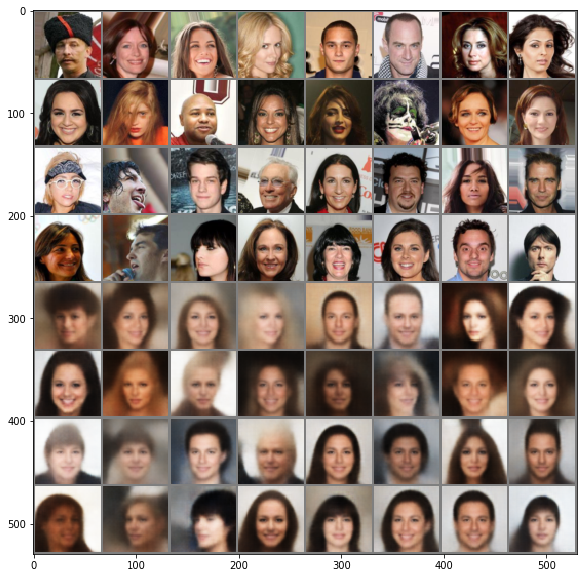

In [5]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
recon=np.rollaxis(recon.numpy(), 0, 3)  
print(recon[265:,:,:].max())
recon[:,:,:]=(recon[:,:,:]+1)/2
plt.imshow(recon[:,:,:].astype(float))

#MNIST
# plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")




In [6]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.tensor(test_batch[0]).cuda())

print(mask,len(torch.nonzero(mask[0]==0)))

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
def show_idx(mask):
    a = mask.cpu().detach().numpy().squeeze()
    return np.array(np.where(a==1))+1
    

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.]], device='cuda:0', grad_fn=<ViewBackward>) 0


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [7]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist, mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist,mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)
#PVAE
#20 20.4 0.34 0.056 ###1 VS N entangle
#32 29.2 0.44 0.040
#64 35.2 0.498 0.039

#VAE
#32 32.1 7.68 0.041
#64 71.3 13.6 0.039

#DIP-VAE
#32 31.9 0.82 0.043
#64 102.3 1.1 0.041

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


19.980447217353486 0.3327405204375585
Valid Loss: 782.062, Recon Error: 0.049


(782.0615096182194, tensor(0.0488, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


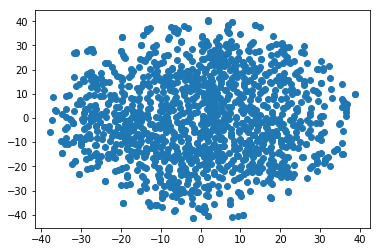

In [8]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

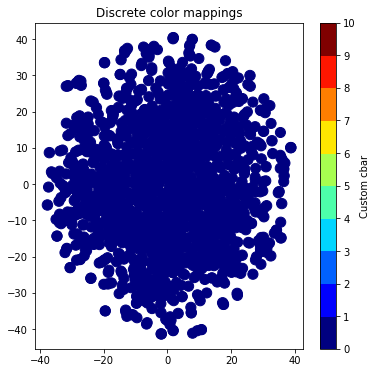

In [9]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

In [10]:
# Plot samples
import matplotlib as mpl

#MNIST
# samples = viz.samples()
# sample=samples.numpy()[0, :, :]/2+0.5
# plt.imshow(sample, cmap='gray')
# plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
fig = plt.figure(figsize=(50, 50)) 
samples = viz.samples()
samples = np.rollaxis(samples.numpy(), 0, 3)  
print(samples[:,:,0].max())
samples=(samples+1)/2
plt.imshow(samples.astype(float),norm = norm)
plt.imsave(path+"/samples",samples)
###DIP

NameError: name 'sample' is not defined

In [ ]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)  
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

In [ ]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
# plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
# plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
show_idx(mask)
#face
traversals = np.rollaxis(traversals.numpy(), 0, 3)
traversals=(traversals+1)/2
plt.imshow(traversals)
plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

In [ ]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     plt.savefig(path+"/cont{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_cont, 1, i + 1)
    traversals=(traversals+1)/2
    plt.imshow(traversals)   
plt.savefig(path+"/cont.png")

show_idx(mask)
    

In [ ]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
#     sub = fig.add_subplot(n_disc, 1, i + 1)
#     plt.savefig(path+"/disc{}.png".format(i))
#     plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
    traversals = np.rollaxis(traversals.numpy(), 0, 3)
    sub = fig.add_subplot(n_disc, 1, i + 1)
traversals=(traversals+1)/2
plt.savefig(path+"/disc{}.png".format(i))
plt.imshow(traversals)

In [ ]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
        generated = (generated +1)/2
        print(generated.min(),generated.max())
        plt.imshow(generated)

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
            result = model.decode(latent_samples).cpu()
        return result

#MNIST
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         plt.imshow(generated.detach().numpy(),cmap="gray")

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#         return model.decode(latent_samples).cpu()

In [ ]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
show_idx(mask)